# Mineria de Texto

##### Integrantes: 
##### - Harold Aquino Curisinche 
##### - Rosa Estrada Estrada
##### Descripción: Aplicación de minería de texto a los reclamos de SUSALUD

## Importación de librerías

In [2]:
import pandas as pd
import numpy as np

##### Manejo de Texto

In [4]:
import re
import string

In [3]:
%pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

##### Analisis de frecuencia de palabras

In [8]:
from collections import Counter

##### Procesamiento del Lenguaje Natural (NLP)

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import bigrams

##### Representación Vectorial de Texto

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


##### Análisis de Sentimiento y Texto

In [14]:
from textblob import TextBlob

#####  Procesamiento Avanzado de Texto

In [16]:
import spacy

##### Descargar recursos de NLTK

In [17]:
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
!python -m spacy download es_core_news_md

     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     - -------------------------------------- 1.8/42.3 MB 8.4 MB/s eta 0:00:05
     --- ------------------------------------ 3.7/42.3 MB 9.1 MB/s eta 0:00:05
     ----- ---------------------------------- 5.8/42.3 MB 9.0 MB/s eta 0:00:05
     ------- -------------------------------- 7.6/42.3 MB 9.0 MB/s eta 0:00:04
     -------- ------------------------------- 9.4/42.3 MB 9.3 MB/s eta 0:00:04
     ---------- ----------------------------- 11.3/42.3 MB 9.0 MB/s eta 0:00:04
     ------------ --------------------------- 13.1/42.3 MB 9.1 MB/s eta 0:00:04
     ------------- -------------------------- 14.7/42.3 MB 8.9 MB/s eta 0:00:04
     --------------- ------------------------ 16.0/42.3 MB 8.7 MB/s eta 0:00:04
     ----------------- ---------------------- 18.1/42.3 MB 8.7 MB/s eta 0:00:03
     ----------------- ---------------------- 18.6/42.3 MB 8.8 MB/s eta 0:00:03
     ----------------- ---------------------- 18.6/42

In [20]:
# Modelo de NLP en español
nlp = spacy.load("es_core_news_md")

In [22]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2)

# Cargar datos y seleccionar campo de texto

In [30]:
df = pd.read_csv("../data/processed/reclamos_descripcionesv2.csv", low_memory=False)

#### Columna donde se encuentra el motivo del reclamo

In [38]:
# Seleccionar la columna de texto relevante
#df_text = df[["CO_UNICO_RECLAMO", "DESCRIPCION"]].dropna()
df_text = df[["CO_UNICO_RECLAMO", "DESCRIPCION"]].replace("-", pd.NA).dropna()
df_text.rename(columns={"DESCRIPCION": "texto"}, inplace=True)

In [40]:
print("Ejemplo de texto:\n", df_text["texto"].sample(5))

Ejemplo de texto:
 88571     Recibí un servicio deficiente de parte de la I...
159813    No estoy seguro de qué tipo de reclamo es este...
51091     No estoy seguro de qué tipo de reclamo es este...
14863     No hay coordinación entre el hospital y el pol...
91979     He tenido una experiencia negativa que describ...
Name: texto, dtype: object


#  Preprocesamiento del texto

In [44]:
def limpiar_texto(texto):
    texto = texto.lower() 
    texto = re.sub(r'\d+', '', texto)
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    
    #Tokenizacion
    tokens = word_tokenize(texto)
    tokens = [word for word in tokens if word not in stopwords.words("spanish")]
    
    # Lematización
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]  
    return " ".join(tokens)

#### Aplicacion de la funcion

In [46]:
df_text["texto_limpio"] = df_text["texto"].apply(limpiar_texto)

In [48]:
print("Ejemplo de texto limpio:\n", df_text["texto_limpio"].sample(5))

Ejemplo de texto limpio:
 57404     nadie explicó podía solicitar segunda opinión ...
66800     asignaron centro especialistas condición pese ...
96126     experiencia negativa describo continuación res...
129901    policlínico zona cuenta traumatólogo pese ser ...
44318          acceso ipress elegido bloqueado razón alguna
Name: texto_limpio, dtype: object


#  Frecuencia de palabras

##### Unimos todo el texto tratado previamente

In [51]:
texto_completo = " ".join(df_text["texto_limpio"])

##### Contamos las palabras mas comunes

In [54]:
palabras = texto_completo.split()
frecuencia = Counter(palabras).most_common(20)

#### Grafico de las palabras mas comunes

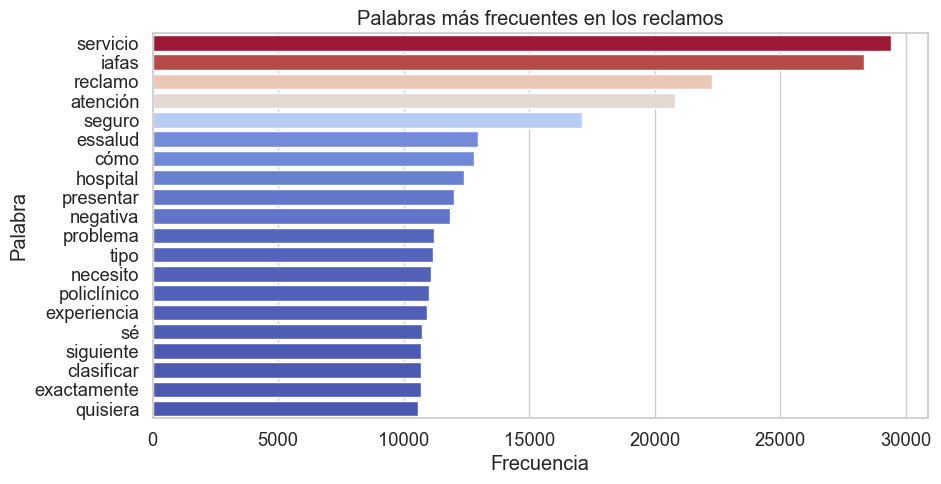

In [56]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[1] for x in frecuencia], y=[x[0] for x in frecuencia], hue=[x[1] for x in frecuencia], palette="coolwarm", legend=False)
plt.title("Palabras más frecuentes en los reclamos")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

# Nube de palabras

In [59]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_completo)

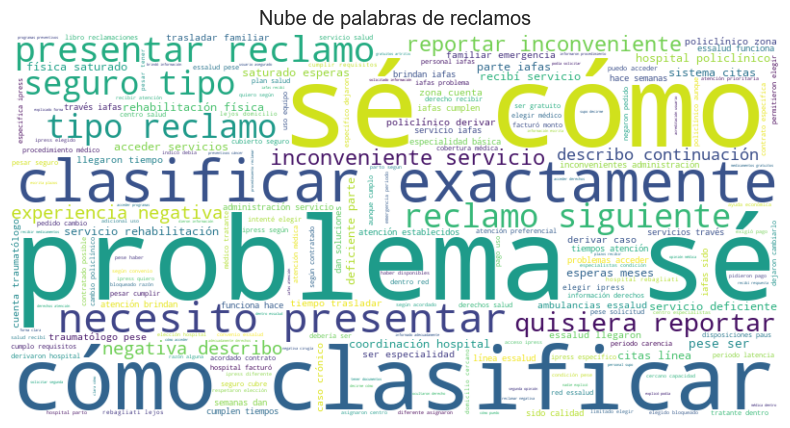

In [61]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras de reclamos")
plt.show()

# Analisis de sentimientos

In [63]:
def obtener_sentimiento(texto):
    analisis = TextBlob(texto)
    return analisis.sentiment.polarity

#### Aplicación del analisis

In [65]:
df_text["sentimiento"] = df_text["texto_limpio"].apply(obtener_sentimiento)

##### Distribucion del sentimiento en reclamos

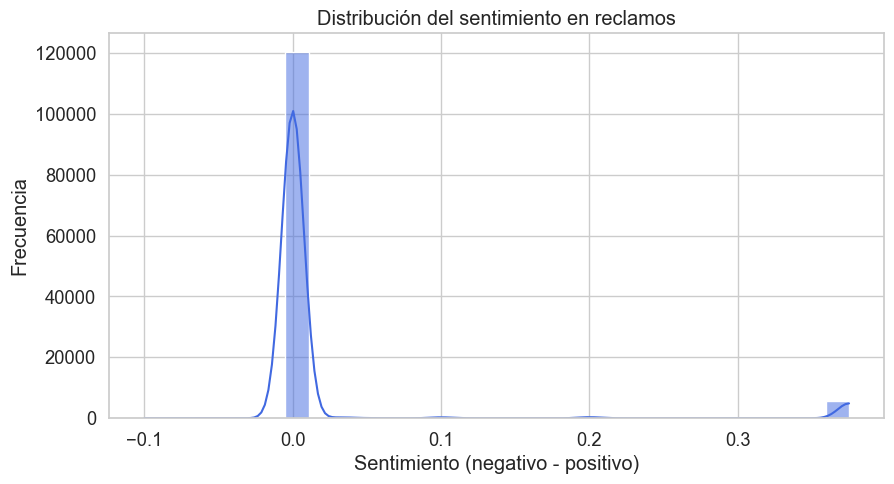

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(df_text["sentimiento"], bins=30, kde=True, color="royalblue")
plt.title("Distribución del sentimiento en reclamos")
plt.xlabel("Sentimiento (negativo - positivo)")
plt.ylabel("Frecuencia")
plt.show()

# Modelado de temas con LDA (Latent Dirichlet Allocation)

In [72]:
from sklearn.decomposition import LatentDirichletAllocation

##### Obtenemos los stopwords en español

In [75]:
stop_words_spanish = stopwords.words('spanish')

##### Se vectoriza el texto

In [153]:
#vectorizer = CountVectorizer(max_features=500, stop_words=stop_words_spanish)
#vectorizer = CountVectorizer(stop_words=stop_words_spanish)
vectorizer = TfidfVectorizer(stop_words=stop_words_spanish)
X = vectorizer.fit_transform(df_text["texto_limpio"])

##### Modelado

In [139]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

##### Palabras clave por tema

In [140]:
palabras = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Tema {i+1}: ", [palabras[i] for i in topic.argsort()[-10:]])

Tema 1:  ['emergencia', 'requisitos', 'seguro', 'solicitud', 'reclamo', 'periodo', 'iafas', 'servicio', 'inconvenientes', 'administración']
Tema 2:  ['seguro', 'sé', 'clasificar', 'exactamente', 'problema', 'iafas', 'atención', 'cumplen', 'tiempos', 'establecidos']
Tema 3:  ['crónico', 'derivar', 'coordinación', 'través', 'problemas', 'servicios', 'parte', 'recibí', 'deficiente', 'iafas']
Tema 4:  ['llegaron', 'meses', 'física', 'saturado', 'esperas', 'rehabilitación', 'atención', 'brindan', 'calidad', 'sido']
Tema 5:  ['presentar', 'reclamo', 'policlínico', 'zona', 'básica', 'especialidad', 'traumatólogo', 'cuenta', 'ser', 'pese']


## Evaluación con Coherencia de Tema

In [127]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [143]:
texts = df_text["texto_limpio"].apply(lambda x: x.split())

In [144]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [146]:
lda_gensim = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=10)

In [147]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherencia del modelo LDA: {coherence_lda}")

Coherencia del modelo LDA: 0.313127257230259


#### Perplejidad 

In [148]:
perplexity = lda.score(X)  # Esto devuelve un valor negativo
print(f"Perplejidad: {-perplexity}")

Perplejidad: 2064439.0640133664


# Visualización de los Temas

In [102]:
%pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.6 MB 8.5 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.6 MB 10.1 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.6 MB 10.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 2.3 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [155]:
import pyLDAvis
import pyLDAvis.lda_model

In [157]:
vis = pyLDAvis.lda_model.prepare(lda, X, vectorizer)
pyLDAvis.display(vis)